train.csv: A full training dataset with the following attributes:

* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as potentially unreliable
* 1: unreliable
* 0: reliable

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from wordcloud import WordCloud
import re

# 1. Data Exploration

In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# adding a new column that combines all the fields: title, author, and text
df['all'] = df['title'] + ' ' + df['author'] + ' ' + df['text']
df.head()

,id,title,author,text,label,all
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
all       2515
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


In [9]:
# can the sum nan values of 'all' be higher than the other columns?

In [10]:
# dropping rows where title = NaN
df_drop = df.dropna(subset=['all'])
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 1000.0+ KB


In [11]:
### using wordcloud to visualize common words for both reliable and unrealible news ###
reliable = df_drop[df['label'] == 0]
unreliable = df_drop[df['label'] == 1]

/Users/emiliobello/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emiliobello/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# converting to list
rel_words = reliable['all'].astype(str).tolist()
unrel_words = unreliable['all'].astype(str).tolist()

In [13]:
# joining into one string
rel_words_onestring = " ".join(rel_words)
unrel_words_onestring = " ".join(unrel_words)

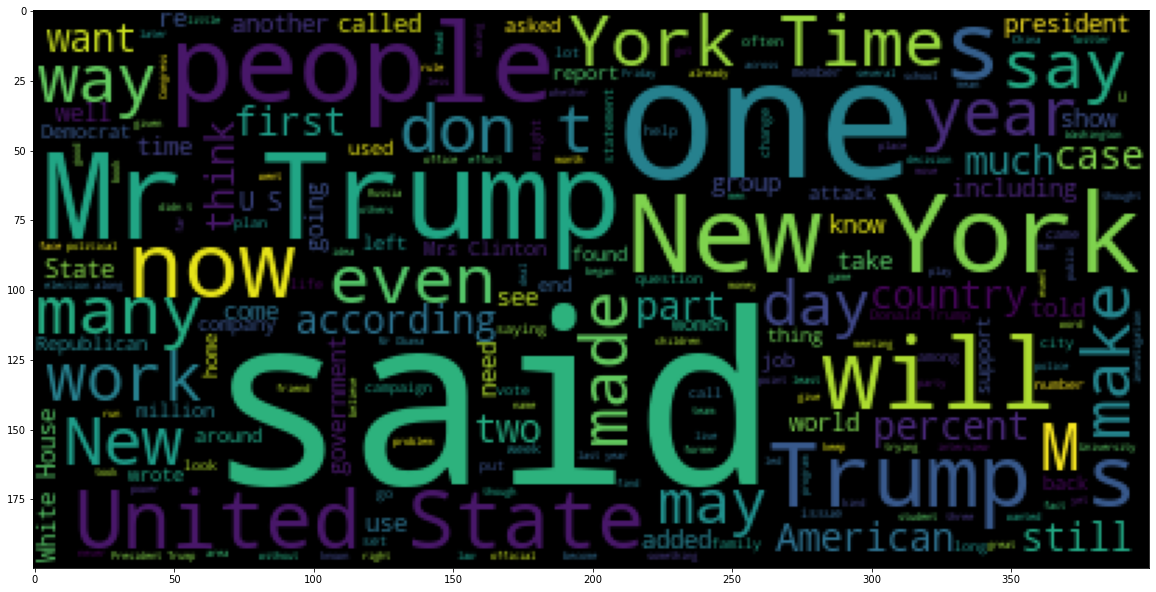

In [14]:
# plotting reliable news
plt.figure(figsize=(20,20));
plt.imshow(WordCloud().generate(rel_words_onestring));
plt.show();

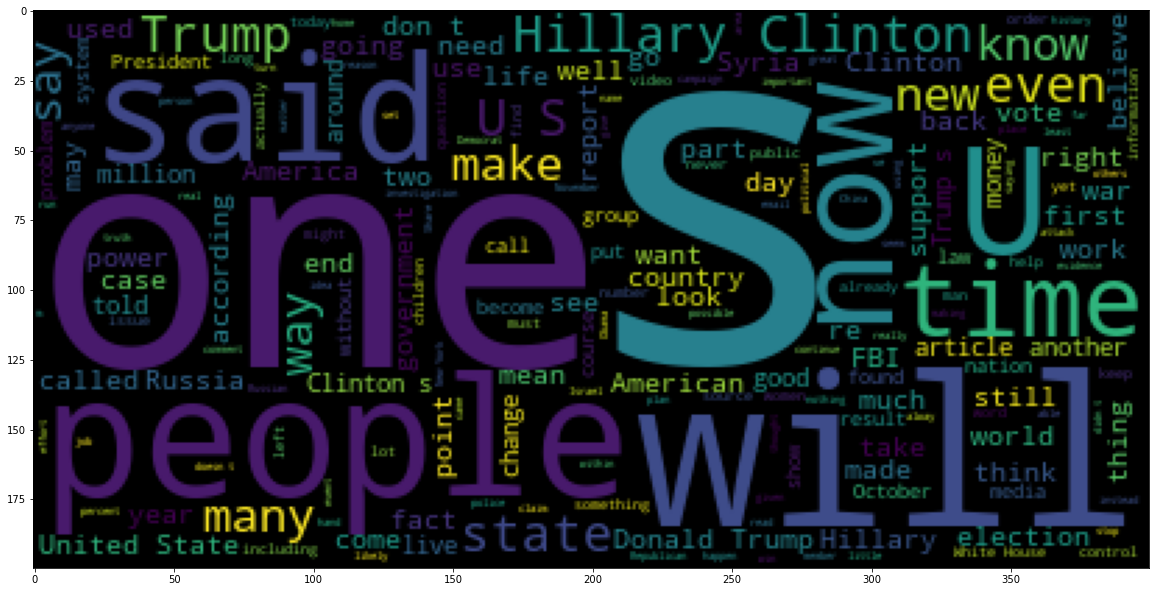

In [15]:
# plotting unrealiable news
plt.figure(figsize=(20,20));
plt.imshow(WordCloud().generate(unrel_words_onestring));
plt.show();

In [16]:
# reliable vs unrealiable split
print( 'Unreliable percentage =', round((len(unreliable) / len(df_drop) )*100, 2),"%")
print( 'Reliable percentage =', round((len(reliable) / len(df_drop) )*100, 2),"%")

Unreliable percentage = 43.34 %
Reliable percentage = 56.66 %


/Users/emiliobello/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


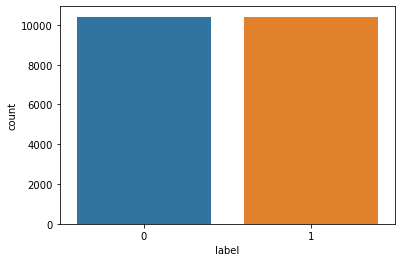

In [17]:
# visualizing reliable vs unrealiable
sns.countplot(df['label'], label = "Count");

# 2. Preprocessing

In [18]:
# removing possesives and contractions
df_replace = df_drop.replace("’s","",regex=True)

In [19]:
# replacing '\n' with blank space
df_replace = df_replace.replace('\n',' ', regex=True)

In [20]:
# using regular expressions to remove special characters
df_regex = df_replace.replace('[^A-Za-z0-9\s]+', '',regex=True)

In [21]:
# removing leading and trailing spaces from 'all'
df_trim = df_regex[['label', 'all']]
df_trim['all'] = df_regex['all'].str.strip()

/Users/emiliobello/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# checking for empty rows
df_trim.loc[df_trim['all'] == '']

,label,all


In [23]:
# final DF for preprocessing
df_news = df_trim.loc[df_trim['all'] != '']
df_news.head()

,label,all
0,1,House Dem Aide We Didnt Even See Comey Letter ...
1,0,FLYNN Hillary Clinton Big Woman on Campus Bre...
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [24]:
df_news.tail()

,label,all
20795,0,Rapper TI Trump a Poster Child For White Supre...
20796,0,NFL Playoffs Schedule Matchups and Odds The N...
20797,0,Macy Is Said to Receive Takeover Approach by H...
20798,1,NATO Russia To Hold Parallel Exercises In Balk...
20799,1,What Keeps the F35 Alive David Swanson David...


In [25]:
# convert 'all' text column to lower case
df_news['all'] = df_news['all'].str.lower()
df_news.head()

,label,all
0,1,house dem aide we didnt even see comey letter ...
1,0,flynn hillary clinton big woman on campus bre...
2,1,why the truth might get you fired consortiumne...
3,1,15 civilians killed in single us airstrike hav...
4,1,iranian woman jailed for fictional unpublished...


In [30]:
# splitting by words, and removing stopwords (previously installed nltk in the PythonML env: python -m nltk.downloader all)
from nltk.corpus import stopwords
split_stop_df = [word for word in df_news['all'].str.split() if word not in stopwords.words('english')]

In [35]:
split_stop_df[1]

['flynn',
 'hillary',
 'clinton',
 'big',
 'woman',
 'on',
 'campus',
 'breitbart',
 'daniel',
 'j',
 'flynn',
 'ever',
 'get',
 'the',
 'feeling',
 'your',
 'life',
 'circles',
 'the',
 'roundabout',
 'rather',
 'than',
 'heads',
 'in',
 'a',
 'straight',
 'line',
 'toward',
 'the',
 'intended',
 'destination',
 'hillary',
 'clinton',
 'remains',
 'the',
 'big',
 'woman',
 'on',
 'campus',
 'in',
 'leafy',
 'liberal',
 'wellesley',
 'massachusetts',
 'everywhere',
 'else',
 'votes',
 'her',
 'most',
 'likely',
 'to',
 'don',
 'her',
 'inauguration',
 'dress',
 'for',
 'the',
 'remainder',
 'of',
 'her',
 'days',
 'the',
 'way',
 'miss',
 'havisham',
 'forever',
 'wore',
 'that',
 'wedding',
 'dress',
 'speaking',
 'of',
 'great',
 'expectations',
 'hillary',
 'rodham',
 'overflowed',
 'with',
 'them',
 '48',
 'years',
 'ago',
 'when',
 'she',
 'first',
 'addressed',
 'a',
 'wellesley',
 'graduating',
 'class',
 'the',
 'president',
 'of',
 'the',
 'college',
 'informed',
 'those',
 'g